<a href="https://colab.research.google.com/github/donkey-king-kong/SC1015_MiniProject_Team1/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to make text lowercase
def make_lowercase(text):
    lower = text.lower()
    return lower

# Function to remove mentions (@username) from text
def remove_mentions(text):
    clean_text = re.sub(r'@\S+', '', text)
    return clean_text

# Function to remove punctuation from text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    clean_text = text.translate(translator)
    return clean_text

# Function to remove URLs from text
def remove_url(text):
    clean_text = re.sub(r'http|www\S+', '', text)
    return clean_text

# Function to remove extra whitespaces from text
def remove_extraspace(text):
    words = text.split()
    updated_text = " ".join(words)
    return updated_text

# Function to remove stopwords from text
def remove_stopwords(text):
    tweet_words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tweet_words if word not in stop_words]
    filtered_tweet = " ".join(filtered_words)
    return filtered_tweet

# Function to remove HTML characters (e.g., &amp;) from text
def remove_strayHTML(text):
    clean_text = text = re.sub(r'&\S+;', '', text)
    return clean_text

# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to remove picture links (e.g., pic.twitter.com) from text
def remove_piclinks(text):
    return re.sub(r'pictwitter\S+', '', text)

# Function to remove short words (length <= 2) from text
def remove_shortwords(text):
    words = text.split()
    long_words = [word for word in words if len(word) > 2]
    return ' '.join(long_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# A single function to preprocess the entire tweets data
def clean_text(text):
    text=make_lowercase(text)
    text=remove_stopwords(text)
    text=remove_mentions(text)
    text=remove_strayHTML(text)
    text=remove_punctuation(text)
    text=remove_url(text)
    text=remove_extraspace(text)
    text=remove_numbers(text)
    text=remove_piclinks(text)
    text=remove_shortwords(text)
    return text

In [5]:
# Apply the clean_text function to each tweet in the 'tweet_text' column of the DataFrame
df['tweet_clean'] = [clean_text(tweet) for tweet in df['tweet_text']]
df.head(5)

,tweet_text,cyberbullying_type,tweet_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...


To analyse and visualze the data we have cleaned to understand its underlying patterns, relationships and anomalies. We would be using data visualization techniques in hopes of generating insights that could help us better understand the data before applying any models or conducting any hypothesis testing.

####**Preliminary Exploration- The Numbers Game**

The "numbers game" is used in our exploratory data analysis where we systematically examined numerical data to identify patterns, trends and anmoalies. Here, we plot the number of tweets belonging to each category in the dataset as well as their relative percentages.

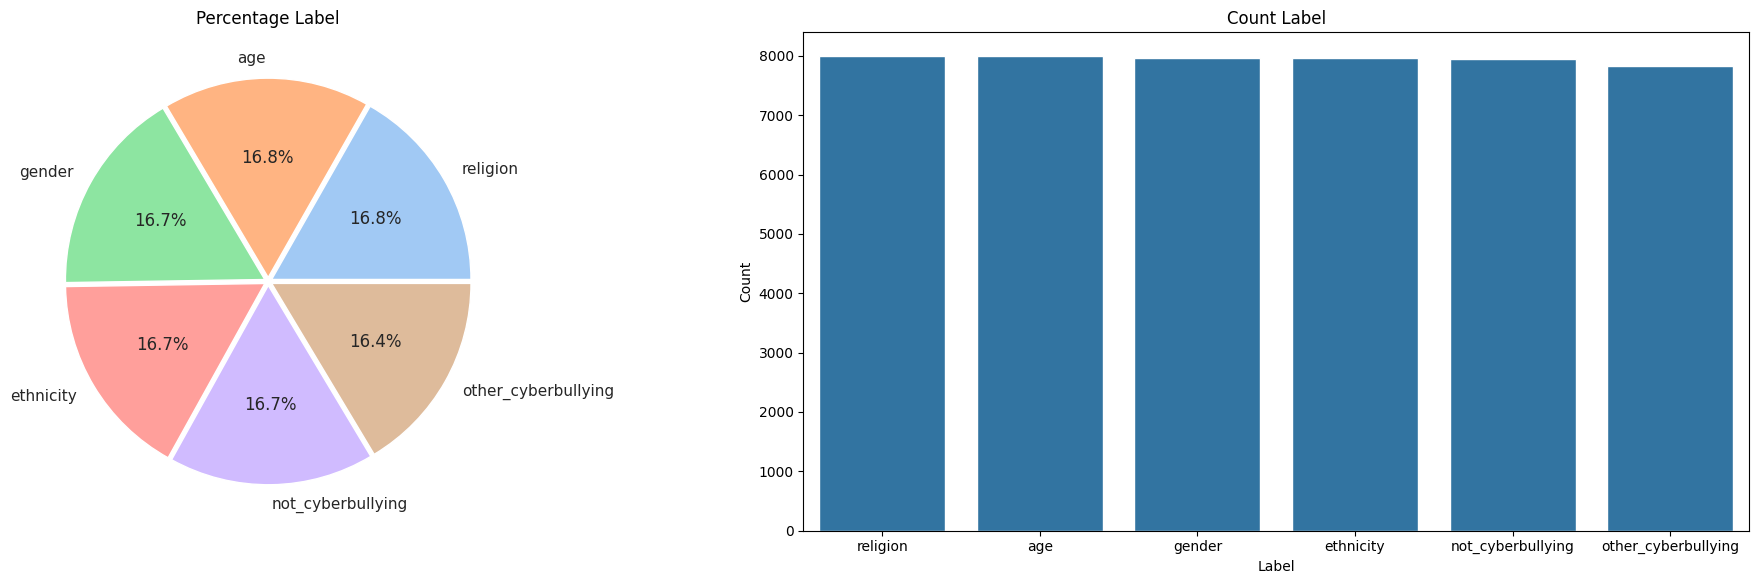

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

# Count occurrences of each label in 'cyberbullying_type' column
label_count = df['cyberbullying_type'].value_counts()

# Create subplots for pie chart and bar chart
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Set seaborn theme and palette
sb.set_theme(style='darkgrid', palette='pastel')

# Define colors and explode values for pie chart
color = sb.color_palette('pastel')
explode = [0.02] * len(label_count)

# Plot pie chart showing percentage of each label
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

# Plot bar chart showing count of each label
sb.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Display the plots
plt.show()

####**Plotting Most Common Words by Tokenisation**

Here, we used tokenization to break down a piece of text like sentences or paragraphs into individual worlds or "tokens". From this plot, we can see the most common words in the tweets of our data.

<ipython-input-7-ab9ba26e409d>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=keys, y=values, palette='mako')


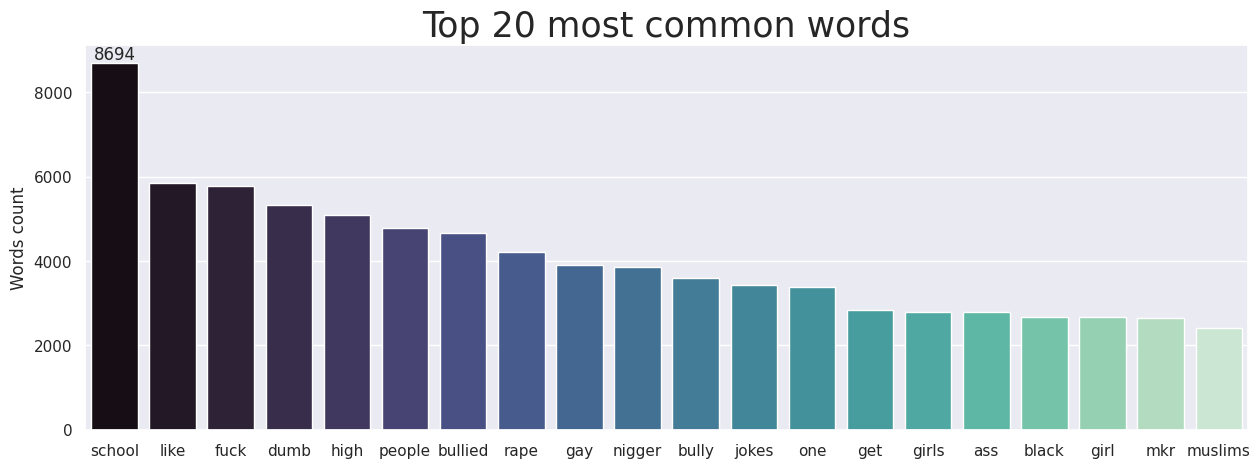

In [7]:
from collections import Counter
import numpy as np

# Define a function to tokenize the text column
def Tokenize(column, seq_len):
    # Create a corpus of words from the text column
    corpus = [word for text in column for word in text.split()]

    # Count the occurrences of each word in the corpus
    count_words = Counter(corpus)

    # Sort words based on their frequencies
    sorted_words = count_words.most_common()

    # Assign unique integer indices to words
    vocab_to_int = {w: i + 1 for i, (w, c) in enumerate(sorted_words)}

    # Tokenize each text in the column using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)

    # Pad/truncate sequences to match the specified sequence length
    features = np.zeros((len(text_int), seq_len), dtype=int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

# Tokenize the tweet_clean column
vocabulary, tokenized_column = Tokenize(df["tweet_clean"], 300)

# Extract the top 20 most common words and their frequencies from the vocabulary
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

# Plotting the top 20 most common words
plt.figure(figsize=(15, 5))
ax = sb.barplot(x=keys, y=values, palette='mako')
plt.title('Top 20 most common words', size=25)
ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()

####**Word Cloud**

For this section, we used a WordCloud to present the most commonly seen words according to each classified category. The presence of each words in a tweet will increase its corresponding probability towards being classified into its respective category.

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(data):
    # Filter text data for a specific cyberbullying type
    text = df[df['cyberbullying_type'] == data]

    # Concatenate all cleaned tweets into a single string
    text_cloud = " ".join(txt for txt in text['tweet_clean'])

    # Generate word cloud
    cloud = WordCloud(collocations=False, background_color='white').generate(text_cloud)

    # Display the word cloud
    plt.imshow(cloud)
    plt.axis('off')  # Hide axis

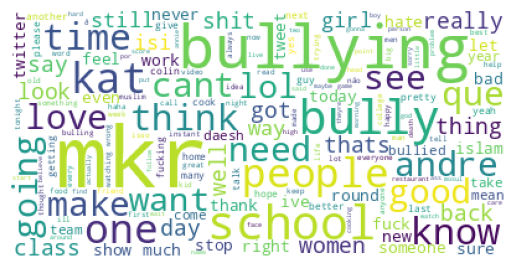

In [9]:
word_cloud('not_cyberbullying')

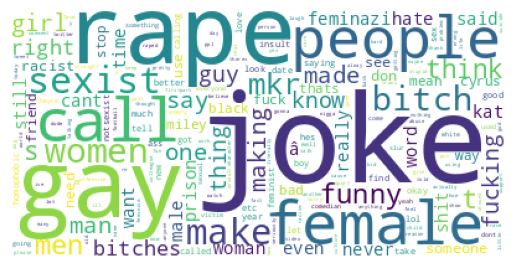

In [10]:
word_cloud('gender')

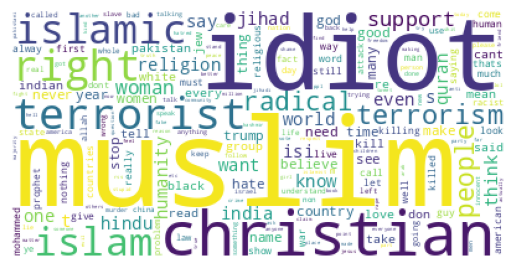

In [11]:
word_cloud('religion')

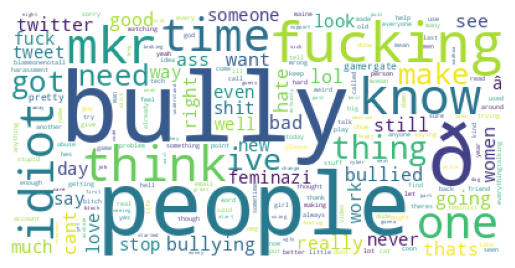

In [12]:
word_cloud('other_cyberbullying')

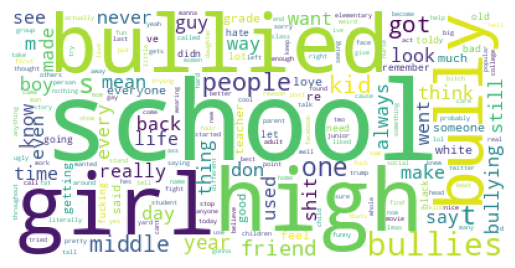

In [13]:
word_cloud('age')

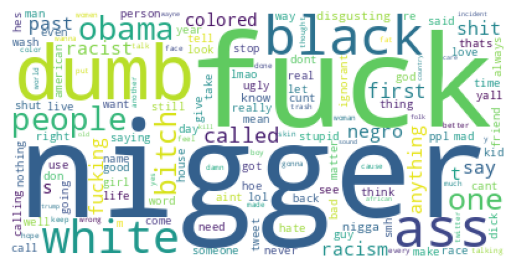

In [14]:
word_cloud('ethnicity')

####**Sentiment Analysis using TextBlob**

For sentiment analysis, we used the the module TextBlob for natural language processing tasks. The sentiment analysis model considers various factors such as word polarity, intensity of sentiment, and context to determine the sentiment score for a given text.

This would help us in identifying sentiments - positive (➕), negative (➖), neutral; from a piece of text.

The sentiment score represents the polarity of the text (Positive, Negative, Neutral). It is a floating point number ranging from -1.0 to +1.0.

* If the sentiment score is close to 1.0, it indicates a very positive sentiment.

* If the sentiment score is close to -1.0, it indicates a very negative sentiment.

* If the sentiment score is around 0.0, it indicates a neutral sentiment.

In [15]:
from textblob import TextBlob

def analyze_sentiment(data):
    sentiments = []
    text = df[df['cyberbullying_type'] == data]
    # Concatenate cleaned tweets into a single string
    text_cloud = " ".join(txt for txt in text['tweet_clean'])
    # Iterate over cleaned tweets
    for tweet in text['tweet_clean']:
        blob = TextBlob(tweet)
        sentiment_score = abs(blob.sentiment.polarity)  # Get absolute value of sentiment polarity
        sentiments.append(sentiment_score)
    return sentiments

# Call the function for each cyberbullying type
not_cyberbullying = analyze_sentiment('not_cyberbullying')
gender = analyze_sentiment('gender')
religion = analyze_sentiment('religion')
other_cyberbullying = analyze_sentiment('other_cyberbullying')
age = analyze_sentiment('age')
ethnicity = analyze_sentiment('ethnicity')

# Print average sentiment scores for each type
print("Average sentiment score for cyberbullying tweets:", (sum(gender)+sum(religion)+sum(age)+sum(ethnicity)+sum(other_cyberbullying)) / (len(gender)+len(religion)+len(age)+len(ethnicity)+len(other_cyberbullying)))
print("Average sentiment score for not_cyberbullying tweets:", sum(not_cyberbullying) / len(not_cyberbullying))
print()
print("Average sentiment score for gender cyberbullying tweets:", sum(gender) / len(gender))
print("Average sentiment score for religion cyberbullying tweets:", sum(religion) / len(religion))
print("Average sentiment score for age cyberbullying tweets:", sum(age) / len(age))
print("Average sentiment score for ethnicity cyberbullying tweets:", sum(ethnicity) / len(ethnicity))
print("Average sentiment score for other_cyberbullying cyberbullying tweets:", sum(other_cyberbullying) / len(other_cyberbullying))

Average sentiment score for cyberbullying tweets: 0.23214846589545213
Average sentiment score for not_cyberbullying tweets: 0.1815547775965969

Average sentiment score for gender cyberbullying tweets: 0.22401663356526427
Average sentiment score for religion cyberbullying tweets: 0.238556910412081
Average sentiment score for age cyberbullying tweets: 0.17458543980641456
Average sentiment score for ethnicity cyberbullying tweets: 0.2716344686110807
Average sentiment score for other_cyberbullying cyberbullying tweets: 0.2525084296956644
